In [145]:
from graphframes import GraphFrame
from pixiedust.display import *
import pyspark.sql.functions as SF 
import networkx as nx
import pandas as pd
import pprint as pp
import matplotlib.pyplot as plt

In [211]:
vertices = spark.createDataFrame([('1', 'Pasley', 'Brad', 50), 
                                  ('2', 'Martin', 'Chris', 43),
                                 ('3', 'Paltrow', 'Gwyneth', 47),
                                  ('4', 'Downey Jr.', 'Robert', 55),
                                  ('9', 'Hanks', 'Tom', 63),
                                 ('5', 'Mcgraw', 'Tim', 53),
                                 ('6', 'Wilson', 'Rita', 63),
                                 ('10', 'Hill', 'Faith', 52),
                                 ('7', 'Hargitay', 'Mariska', 56)
                                 ,('8', 'Meloni', 'Chris', 59)],
                                 ['id', 'name', 'firstname', 'age'])
edges = spark.createDataFrame([('1', '2', 'follows'), 
                              ('3', '1', 'friend'),
                              ('1', '3', 'friend'),
                               ('3', '4', 'friend'),
                               ('4', '3', 'friend'),
                               ('5', '3', 'friend'),
                               ('3', '5', 'friend'),
                               ('4', '5', 'follows'),
                               ('6', '9', 'married'),
                               ('9', '6', 'married'),
                               ('8', '7', 'BFF'),
                               ('7', '8', 'BFF'),
                               ('7', '6', 'follows'),
                               ('7', '9', 'follows'),
                               ('10', '9', 'friend'),
                               ('9', '10', 'friend'),
                               ('10', '6', 'friend'),
                               ('6', '10', 'friend'),
                               ('5', '6', 'friend'),
                               ('6', '5', 'friend'),
                               ('5', '6', 'friend'),
                               ('6', '5', 'friend'),
                               ('10', '5', 'married'),
                               ('5', '10', 'married'),
                               
                              ],
                              ['src', 'dst', 'type'])
g = GraphFrame(vertices, edges)

# LETRA A 

In [212]:
display(g)

In [232]:
g1=edges.withColumnRenamed("src","source").withColumnRenamed("dst","target").toPandas()
g2 = nx.DiGraph(g1)


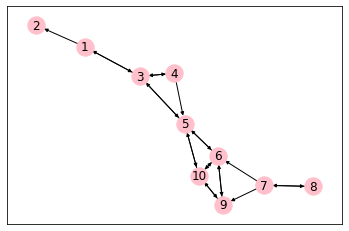

<Figure size 1080x720 with 0 Axes>

In [235]:
options = {
    'node_color': 'pink',
    'node_size': 300,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 7,
}
nx.draw_networkx(g2, arrows=True, **options)
plt.figure(figsize=(15,10))
plt.show()

# LETRA B

In [215]:
df=g.triangleCount()

In [216]:
df.show()

+-----+---+----------+---------+---+
|count| id|      name|firstname|age|
+-----+---+----------+---------+---+
|    1|  7|  Hargitay|  Mariska| 56|
|    1|  3|   Paltrow|  Gwyneth| 47|
|    0|  8|    Meloni|    Chris| 59|
|    2|  5|    Mcgraw|      Tim| 53|
|    3|  6|    Wilson|     Rita| 63|
|    2|  9|     Hanks|      Tom| 63|
|    0|  1|    Pasley|     Brad| 50|
|    2| 10|      Hill|    Faith| 52|
|    1|  4|Downey Jr.|   Robert| 55|
|    0|  2|    Martin|    Chris| 43|
+-----+---+----------+---------+---+



In [217]:
df1=df.toPandas()

In [218]:
(sum(df1["count"])/3)

4.0

# LETRA C

In [219]:
grau=g.degrees

In [220]:
grau.orderBy(SF.desc("degree")).show()

+---+------+
| id|degree|
+---+------+
|  6|     9|
|  5|     9|
| 10|     6|
|  3|     6|
|  9|     5|
|  7|     4|
|  1|     3|
|  4|     3|
|  8|     2|
|  2|     1|
+---+------+



In [221]:
print("Id -> 6")
print(nx.clustering(g2,'6'))


Id -> 6
0.5


In [222]:
print("Id -> 5")

print(nx.clustering(g2,'5'))


Id -> 5
0.3333333333333333


In [223]:
print("Id -> 10")

print(nx.clustering(g2,'10'))


Id -> 10
0.6666666666666666


# LETRA D

In [224]:
spark.sparkContext.setCheckpointDir('./checkpoint')

In [225]:
SCC=g.stronglyConnectedComponents(maxIter=30)

In [226]:
CC=g.connectedComponents()

In [227]:
SCC.show()

+---+----------+---------+---+-------------+
| id|      name|firstname|age|    component|
+---+----------+---------+---+-------------+
|  1|    Pasley|     Brad| 50| 154618822656|
|  9|     Hanks|      Tom| 63| 154618822656|
|  8|    Meloni|    Chris| 59|  25769803776|
|  3|   Paltrow|  Gwyneth| 47| 154618822656|
|  2|    Martin|    Chris| 43|1623497637888|
| 10|      Hill|    Faith| 52| 154618822656|
|  4|Downey Jr.|   Robert| 55| 154618822656|
|  7|  Hargitay|  Mariska| 56|  25769803776|
|  6|    Wilson|     Rita| 63| 154618822656|
|  5|    Mcgraw|      Tim| 53| 154618822656|
+---+----------+---------+---+-------------+



In [228]:
CC.show()

+---+----------+---------+---+-----------+
| id|      name|firstname|age|  component|
+---+----------+---------+---+-----------+
|  1|    Pasley|     Brad| 50|25769803776|
|  2|    Martin|    Chris| 43|25769803776|
|  3|   Paltrow|  Gwyneth| 47|25769803776|
|  4|Downey Jr.|   Robert| 55|25769803776|
|  9|     Hanks|      Tom| 63|25769803776|
|  5|    Mcgraw|      Tim| 53|25769803776|
|  6|    Wilson|     Rita| 63|25769803776|
| 10|      Hill|    Faith| 52|25769803776|
|  7|  Hargitay|  Mariska| 56|25769803776|
|  8|    Meloni|    Chris| 59|25769803776|
+---+----------+---------+---+-----------+



# LETRA E

In [229]:
LP= g.labelPropagation(maxIter=10)

In [230]:
LP.show()

+---+----------+---------+---+------------+
| id|      name|firstname|age|       label|
+---+----------+---------+---+------------+
|  1|    Pasley|     Brad| 50|420906795008|
|  9|     Hanks|      Tom| 63|420906795008|
|  8|    Meloni|    Chris| 59|223338299392|
|  3|   Paltrow|  Gwyneth| 47|154618822656|
|  2|    Martin|    Chris| 43|154618822656|
| 10|      Hill|    Faith| 52|644245094400|
|  4|Downey Jr.|   Robert| 55|420906795008|
|  7|  Hargitay|  Mariska| 56| 25769803776|
|  6|    Wilson|     Rita| 63|644245094400|
|  5|    Mcgraw|      Tim| 53|420906795008|
+---+----------+---------+---+------------+

